<a href="https://colab.research.google.com/github/JK11751/CLASS-MANAGEMENT-MINISYSTEM/blob/master/Inferencing_With_The_Bayesian_Network_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.1 MB/s eta 0:00:00


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

# Defining Bayesian Structure
model = BayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])

# Defining the CPDs:
cpd_guest = TabularCPD('Guest', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Guest', 'Price'], evidence_card=[3, 3])

# Associating the CPDs with the network structure.
model.add_cpds(cpd_guest, cpd_price, cpd_host)

# Some other methods
model.get_cpds()

[<TabularCPD representing P(Guest:3) at 0x79ae28c92530>,
 <TabularCPD representing P(Price:3) at 0x79ae28c91b40>,
 <TabularCPD representing P(Host:3 | Guest:3, Price:3) at 0x79ae28c919c0>]

In [ ]:
# check for the model structure and the associated CPD and returns True
model.check_model()

True

In [ ]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 2, 'Price': 2})
print(posterior_p)

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.5000 |
+---------+-------------+
| Host(1) |      0.5000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


In [ ]:
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(model.edges())


In [ ]:
nx.draw(nx_graph, with_labels=True)
image_path = 'model.png'
plt.savefig(image_path)
plt.close()

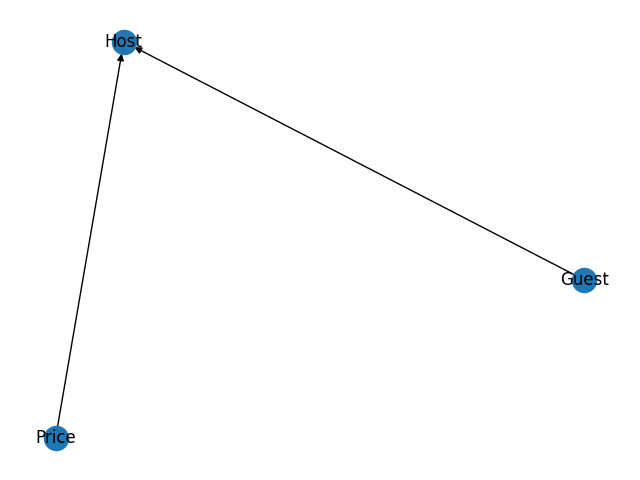

In [ ]:
from IPython.display import Image, display
display(Image(filename=image_path))